In [1]:
%pylab inline
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize

Populating the interactive namespace from numpy and matplotlib


In [2]:
# N=20取bin的函数

def databin_20(lst):
    result = [[]]    
    length = len(lst)
    n = 0
    for i in range(length):
        result[-1].append(math.log(lst[i],10))
        n = n+1
        if n == 20:
            n = 0
            result.append([])
    output=[]
    for j in range(len(result)):
        output.append(np.mean(result[j])) 
    return output

def databin_20_std(lst):
    result = [[]]
    length = len(lst)
    n = 0
    for i in range(length):
        result[-1].append(math.log(lst[i],10))
        n = n+1
        if n == 20:
            n = 0
            result.append([])        
    output=[]
    for j in range(len(result)):
        output.append(np.std(result[j]))
    return output


In [3]:
#光变曲线

# 提取数据长度
data = pd.read_csv("0.3_10_final.csv")  
counts_data = data['RATE']
dt=100
mean_x_data = np.mean(counts_data)

N=len(counts_data)
N_randomlc=len(counts_data)

omega = []
POW = []
DFT = []
fr = []
fi = []
f1 = []
f2 = []
p = []
f = []


counts_list=[None for i in range(500)]

# 500条光变曲线
for a in range(500):
    f_b=1.7E-4
    alpha_H=3.8
    alpha_L=1.0
    for j in range(1,int(N_randomlc)+1):
        omega.append(j/(N_randomlc*dt))
        POW.append(((omega[-1]**(-alpha_L))/(1+(omega[-1]/f_b)**(alpha_H-alpha_L)))*0.005)
        DFT.append(complex(np.sqrt(POW[-1]),np.sqrt(POW[-1])))
        s1=np.random.normal(loc=0.0, scale=1.0, size=None)
        s2=np.random.normal(loc=0.0, scale=1.0, size=None)
        fr.append((DFT[-1].real)*s1)
        fi.append((DFT[-1].imag)*s2)
        f1.append(complex(fr[-1],fi[-1]))
    counts = ifft(f1)
    counts_list[a]=counts





'''
pnum = np.arange(len(counts))
t = [i*dt for i in pnum]


plt.figure(figsize=(10,8))
plt.plot(t,counts,'b')
plt.xlabel("time")
plt.ylabel("counts")
plt.title("lightcurve")
plt.show() 
'''

'\npnum = np.arange(len(counts))\nt = [i*dt for i in pnum]\n\n\nplt.figure(figsize=(10,8))\nplt.plot(t,counts,\'b\')\nplt.xlabel("time")\nplt.ylabel("counts")\nplt.title("lightcurve")\nplt.show() \n'

In [4]:

# ????    
# 可以直接在光变曲线上乘上数据光变曲线的平均值，相当于加上泊松噪声    


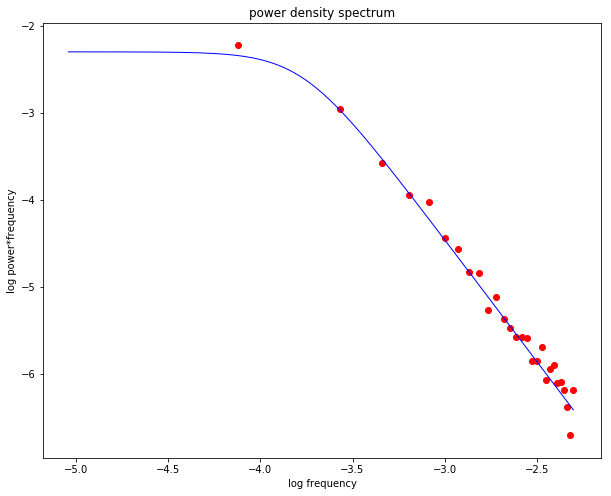

In [5]:
#周期图

per_list=[None for i in range(500)]

for a in range(500):
    nf = N/2
    df = 1/(dt*N)
    F_a = np.arange(1,nf+1)
    F = [i*df for i in F_a]
    F1 = F[0:int(nf)]
    mean_x = np.mean(counts_list[a])
    x_new  = [i-mean_x for i in counts_list[a]]
    dft   = fft(counts_list[a])
    dft_1 = dft[1:int(nf)+1]
    per = (abs(dft_1)**2)

    per_list[a] = per


    
# 500条周期图取 mean,std
per_everypoint_list=[]
for i in range(int(nf)):
    per_everypoint_list.append([])
ADM=[]
ADM_std=[]
for m in range(int(nf)):
    for n in range(500):
        per_everypoint_list[m].append(per_list[n][m])
        
for m in range(int(nf)):
    ADM.append(np.mean(per_everypoint_list[m]))
    ADM_std.append(np.std(per_everypoint_list[m]))    

    


POW1=POW[0:int(nf)]
P_TIMES_F = np.multiply(np.array(F1),np.array(POW1))
F1_log = [math.log(i,10) for i in F1]
PTF_log = [math.log(i,10) for i in P_TIMES_F]



# ADM取bin
ADM_binned=databin_20(ADM)
ADM_binned_std=databin_20_std(ADM)
F1_binned=databin_20(F1)
'''ADM_times_f_binned=np.multiply(np.array(F1_binned),np.array(ADM_binned))'''
ADM_times_f_binned = np.array(F1_binned)+np.array(ADM_binned)



plt.figure(figsize=(10,8))
plt.plot(F1_log,PTF_log,color="b",linewidth=1)
plt.scatter(F1_binned,ADM_times_f_binned,color="r",linewidth=1)    
plt.xlabel("log frequency")
plt.ylabel("log power*frequency")
plt.title("power density spectrum")
plt.show()

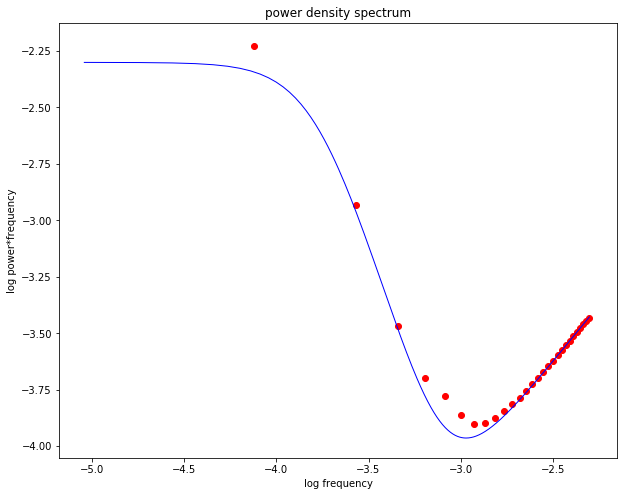

In [16]:
# 加上泊松项？
ADM_with_poisson = [i+2/mean_x_data for i in ADM]

        
        
POW1=POW[0:int(nf)]

POW_ps = [i+2/mean_x_data for i in POW1]
PTF_ps = np.multiply(np.array(F1),np.array(POW_ps))
F1_log = [math.log(i,10) for i in F1]
PTF_ps_log = [math.log(i,10) for i in PTF_ps]

#加上泊松项并分bin
ADM_binned_ps = databin_20(ADM_with_poisson)
F1_binned = databin_20(F1)
'''ADM_times_f_b_ps = np.multiply(np.array(F1_binned),np.array(ADM_binned_ps))'''
ADM_times_f_b_ps = np.array(F1_binned)+np.array(ADM_binned_ps)


plt.figure(figsize=(10,8))
plt.plot(F1_log,PTF_ps_log,color="b",linewidth=1)
plt.scatter(F1_binned,ADM_times_f_b_ps,color="r",linewidth=1)  
plt.xlabel("log frequency")
plt.ylabel("log power*frequency")
plt.title("power density spectrum")
plt.show()

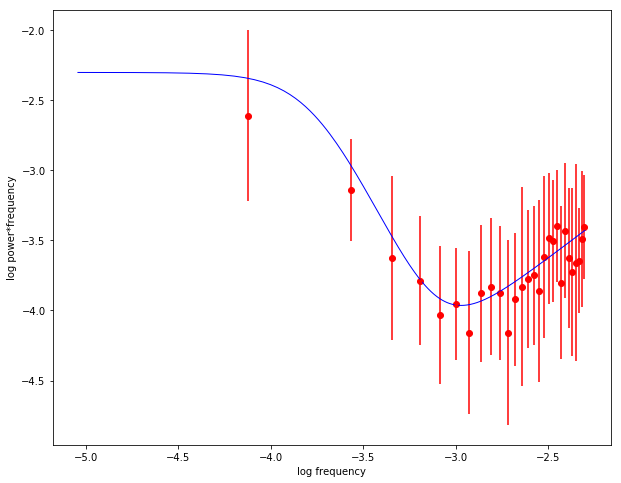

In [17]:
# 从数据得到参考周期图

data = pd.read_csv("0.3_10_final.csv")  

dt=100
counts_data = data['RATE']
N=len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]

'''
plt.figure(figsize=(10,8))
plt.plot(t,counts_data,'b')
plt.xlabel("TIME(s)")
plt.ylabel("RATE(coount/s)")
plt.title("lightcurve")
plt.show()    
'''

nf = N/2
df = 1/(dt*N)
F_num = np.arange(1,nf)
F = [i*df for i in F_num]
mean_x = np.mean(counts_data)
dft = fft(counts_data)
dft1= dft[1:int(nf)+1]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))



# 数据分bin
per_data_binned = databin_20(per_data)
per_data_b_std = databin_20_std(per_data)
'''p_times_f_data_b = np.multiply(np.array(F1_binned),np.array(per_data_binned))'''
p_times_f_data_b = np.array(F1_binned)+np.array(per_data_binned)



plt.figure(figsize=(10,8))
plt.scatter(F1_binned,p_times_f_data_b,color="r",linewidth=1) 
plt.errorbar(F1_binned,p_times_f_data_b,yerr=per_data_b_std, fmt='.r')
plt.plot(F1_log,PTF_ps_log,color="b",linewidth=1) 
plt.xlabel("log frequency")
plt.ylabel("log power*frequency")
plt.show()

In [8]:
# chi2 =（每一点500平均值 - 每一点数据得到）/ 每一点的500标准差  求和

chi2=0
for i in range(len(ADM_binned_ps)):
    chi2 = chi2+(((ADM_binned_ps[i]-per_data_binned[i])/per_data_b_std[i])**2)

print (chi2)


2.921970124922109


In [9]:
def chi2_of_model(A):
    data = pd.read_csv("0.3_10_final.csv")  
    counts_data = data['RATE']
    dt=100
    mean_x_data = np.mean(counts_data)
    N=len(counts_data)
    N_randomlc=len(counts_data)
    
    omega = []
    POW = []
    DFT = []
    fr = []
    fi = []
    f1 = []
    f2 = []
    p = []
    f = []
    
    counts_list=[None for i in range(500)]
    
    
    # 500条光变曲线
    for a in range(500): 
        f_b=1.7E-4
        alpha_H=3.8
        alpha_L=1.0
        for j in range(1,int(N_randomlc)+1):
            omega.append(j/(N_randomlc*dt))
            POW.append(((omega[-1]**(-alpha_L))/(1+(omega[-1]/f_b)**(alpha_H-alpha_L)))*A)
            DFT.append(complex(np.sqrt(POW[-1]),np.sqrt(POW[-1])))
            s1=np.random.normal(loc=0.0, scale=1.0, size=None)
            s2=np.random.normal(loc=0.0, scale=1.0, size=None)
            fr.append((DFT[-1].real)*s1)
            fi.append((DFT[-1].imag)*s2)
            f1.append(complex(fr[-1],fi[-1]))
        counts = ifft(f1)
        counts_list[a]=counts
    
    
    #周期图
    per_list=[None for i in range(500)]
    for a in range(500):
        nf = N/2 
        df = 1/(dt*N)
        F_a = np.arange(1,nf+1)
        F = [i*df for i in F_a]
        F1 = F[0:int(nf)]
        mean_x = np.mean(counts_list[a])
        x_new  = [i-mean_x for i in counts_list[a]]
        dft   = fft(counts_list[a])
        dft_1 = dft[1:int(nf)+1]
        per = (abs(dft_1)**2)
        per_list[a] = per
    
    
    # 500条周期图取 mean,std
    per_everypoint_list=[]
    for i in range(int(nf)):
        per_everypoint_list.append([])
    ADM=[]
    ADM_std=[]
    for m in range(int(nf)):
        for n in range(500):
            per_everypoint_list[m].append(per_list[n][m])
        
    for m in range(int(nf)):
        ADM.append(np.mean(per_everypoint_list[m]))
        ADM_std.append(np.std(per_everypoint_list[m]))    
        
        
    POW1=POW[0:int(nf)]
    P_TIMES_F = np.multiply(np.array(F1),np.array(POW1))
    F1_log = [math.log(i,10) for i in F1]
    PTF_log = [math.log(i,10) for i in P_TIMES_F]
    

    
    
    #加上泊松项并分bin
    ADM_with_poisson = [i+2/mean_x_data for i in ADM]
    ADM_binned_ps = databin_20(ADM_with_poisson)
    F1_binned = databin_20(F1)
    ADM_times_f_b_ps = np.array(F1_binned)+np.array(ADM_binned_ps)
    
    
    # 从数据得到参考周期图
    pnum = np.arange(len(counts_data))
    t = [i*dt for i in pnum]
    
    nf = N/2
    df = 1/(dt*N)
    F_num = np.arange(1,nf)
    F = [i*df for i in F_num]
    mean_x = np.mean(counts_data)
    dft = fft(counts_data)
    dft1= dft[1:int(nf)+1]
    per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
    
    
    # 数据分bin
    per_data_binned = databin_20(per_data)
    per_data_b_std = databin_20_std(per_data)
    p_times_f_data_b = np.array(F1_binned)+np.array(per_data_binned)
    
    
    chi2=0
    for i in range(len(ADM_binned_ps)):
        chi2 = chi2+(((ADM_binned_ps[i]-per_data_binned[i])/per_data_b_std[i])**2)    
    
    print('chi2 of this time = ',chi2)
    
    return (chi2)

In [10]:
print(chi2_of_model(0.005))

chi2 of this time =  2.7571222309627315
2.7571222309627315


In [11]:
print(chi2_of_model(0.005))

chi2 of this time =  2.3140334785244
2.3140334785244


In [12]:
print(chi2_of_model(0.005))

chi2 of this time =  2.762232826234981
2.762232826234981


In [13]:
print(chi2_of_model(0.005))

chi2 of this time =  2.323397419993069
2.323397419993069


In [14]:
print(chi2_of_model(0.005))

chi2 of this time =  2.9447632170961366
2.9447632170961366


In [15]:
2.723
2.633
2.722
2.356
2.079
2.266
2.921
2.757
2.314
2.762
2.323
2.944

2.266